In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ***Dataset: SuperStoreOrders.csv***

In [2]:
store_df = pd.read_csv('SuperStoreOrders.csv', index_col = 'order_id')
store_df.head()

,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
order_id,,,,,,,,,,,,,,,,,,,,
AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


## **1. Khám phá dữ liệu**

### *1.1. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?*

* Theo mô tả dữ liệu và quan sát sơ bộ SuperStore Sales Dataset, một dòng cho biết các thông tin chi tiết về mỗi đơn đặt hàng của từng khách hàng.
* Không có vấn đề các dòng có ý nghĩa khác nhau.

### *1.2. Mỗi cột có ý nghĩa gì?*

Ý nghĩa từng cột:
- **order_id**: mã hóa đơn.
- **order_date**: ngày đặt đơn hàng.
- **ship_date**: ngày giao đơn hàng.
- **ship_mode**: loại vận chuyển.
- **customer_name**: tên khách hàng.
- **segment**: phân khúc khách hàng.
- **state**: bang/thành phố trong đơn đặt hàng.
- **country**: quốc gia trong đơn đặt hàng.
- **market**: thị trường trong đơn đặt hàng.
- **region**: vùng trong đơn đặt hàng.
- **product_id**: mã sản phẩm.
- **category**: loại sản phẩm.
- **sub_category**: phân loại chi tiết sản phẩm.
- **product_name**: tên sản phẩm.
- **sales**: doanh thu của từng đơn đặt hàng.
- **quantity**: số lượng sản phẩm trong đơn đặt hàng.
- **discount**: phần trăm giảm giá của đơn đặt hàng.
- **profit**: lợi nhuận thu được từ từng đơn đặt hàng.
- **shipping_cost**: phí vận chuyển của từng đơn đặt hàng.
- **order_priority**: mức độ ưu tiên của đơn đặt hàng.
- **year**: năm đặt đơn.

### *1.3. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?*

In [3]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51290 entries, AG-2011-2040 to CA-2014-156720
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_date      51290 non-null  object 
 1   ship_date       51290 non-null  object 
 2   ship_mode       51290 non-null  object 
 3   customer_name   51290 non-null  object 
 4   segment         51290 non-null  object 
 5   state           51290 non-null  object 
 6   country         51290 non-null  object 
 7   market          51290 non-null  object 
 8   region          51290 non-null  object 
 9   product_id      51290 non-null  object 
 10  category        51290 non-null  object 
 11  sub_category    51290 non-null  object 
 12  product_name    51290 non-null  object 
 13  sales           51290 non-null  object 
 14  quantity        51290 non-null  int64  
 15  discount        51290 non-null  float64
 16  profit          51290 non-null  float64
 17  shipping_cost   

*Kiểm tra xem có cột nào có kiểu dữ liệu chưa phù hợp không?*
* Các cột **order_date**, **ship_date**, **ship_mode**, **customer_name**, **segment**, **state**, **country**, **market**, **region**, **product_id**, **category**, **sub_category**, **product_name**, **sales** đều có dtype là object, thường ám chỉ kiểu chuỗi. Để kiểm tra được kiểu dữ liệu thật sự của các phần tử trong cột thì phải tiến hành truy xuất vào từng phần tử và dùng câu lệnh type để xem kiểu dữ liệu.

In [4]:
for i in range(len(store_df)):
    assert type(store_df['order_date'].iloc[i]) == str
    assert type(store_df['ship_date'].iloc[i]) == str
    assert type(store_df['ship_mode'].iloc[i]) == str
    assert type(store_df['customer_name'].iloc[i]) == str 
    assert type(store_df['segment'].iloc[i]) == str 
    assert type(store_df['state'].iloc[i]) == str
    assert type(store_df['country'].iloc[i]) == str
    assert type(store_df['market'].iloc[i]) == str
    assert type(store_df['region'].iloc[i]) == str 
    assert type(store_df['product_id'].iloc[i]) == str 
    assert type(store_df['category'].iloc[i]) == str 
    assert type(store_df['sub_category'].iloc[i]) == str 
    assert type(store_df['product_name'].iloc[i]) == str 
    assert type(store_df['sales'].iloc[i]) == str 
    assert type(store_df['order_priority'].iloc[i]) == str 

- Như vậy, kiểu dữ liệu của các phần tử trong các cột **ship_mode**, **customer_name**, **segment**, **state**, **country**, **market**, **region**, **product_id**, **category**, **sub_category**, **product_name**, **order_priority** đều là kiểu chuỗi, nên phù hợp. Tuy nhiên, các thuộc tính trên trừ **customer_name**, **product_id**, **product_name** đều có thể chuyển về kiểu **category**.
- Các cột **order_date**, **ship_date** đều là dữ liệu chỉ ngày tháng nên cần chuyển về kiểu **datetime**.
- Các cột **quantity**, **year** đều có dữ liệu chỉ số lượng, nên kiểu dữ liệu **int64** là phù hợp. Tuy nhiên, cột **sales** cũng là dữ liệu ám chỉ số lượng nhưng lại có kiểu là **object** nên chưa phù hợp, cần chuyển về **int64**.
- Các cột **discount**, **profit**, **shipping_cost** chứa dữ liệu là những chỉ số, có thể không phải ở dạng số nguyên nên kiểu dữ liệu **float64** là phù hợp.

In [5]:
features = ['ship_mode', 'segment', 'state', 'country', 'market', 'region', 'category', 'sub_category', 'order_priority']

def convert_categorical(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")

convert_categorical(store_df, features)

In [6]:
features = ['order_date', 'ship_date']

def convert_categorical(df, features):
    for feature in features:
        df[feature] = pd.to_datetime(df[feature], dayfirst = True)

convert_categorical(store_df, features)

In [7]:
store_df['sales'] = store_df['sales'].str.replace(',', '').astype("int64")

In [8]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51290 entries, AG-2011-2040 to CA-2014-156720
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_date      51290 non-null  datetime64[ns]
 1   ship_date       51290 non-null  datetime64[ns]
 2   ship_mode       51290 non-null  category      
 3   customer_name   51290 non-null  object        
 4   segment         51290 non-null  category      
 5   state           51290 non-null  category      
 6   country         51290 non-null  category      
 7   market          51290 non-null  category      
 8   region          51290 non-null  category      
 9   product_id      51290 non-null  object        
 10  category        51290 non-null  category      
 11  sub_category    51290 non-null  category      
 12  product_name    51290 non-null  object        
 13  sales           51290 non-null  int64         
 14  quantity        51290 non-null  int64  

In [9]:
store_df.head()

,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
order_id,,,,,,,,,,,,,,,,,,,,
AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


## **2. Bảng tần số dữ liệu định tính**

Qualitative data:
- Nominal: segment, state, country, market, region, category, sub_category
- Ordinal: ship_mode, order_priority

In [10]:
store_df.describe(include = 'category')

,ship_mode,segment,state,country,market,region,category,sub_category,order_priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,4,3,1094,147,7,13,3,17,4
top,Standard Class,Consumer,California,United States,APAC,Central,Office Supplies,Binders,Medium
freq,30775,26518,2001,9994,11002,11117,31273,6152,29433


#### **2.1. Nominal**

##### ***Segment***

In [11]:
store_df['segment'].value_counts().to_frame()

,segment
Consumer,26518
Corporate,15429
Home Office,9343


Text(0.5, 1.0, 'Distribution of Segment')

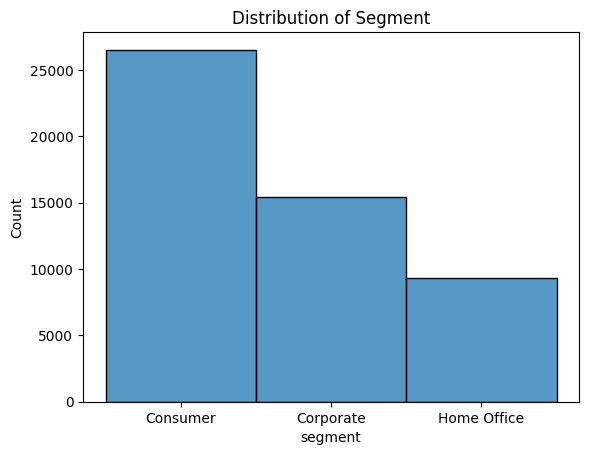

In [12]:
sns.histplot(data = store_df, x = 'segment').set_title('Distribution of Segment')

##### ***Country***

In [13]:
store_df['country'].value_counts().to_frame()

,country
United States,9994
Australia,2837
France,2827
Mexico,2644
Germany,2065
...,...
Eritrea,2
Swaziland,2
Burundi,2
Chad,2


##### ***State***

In [14]:
store_df['state'].value_counts().to_frame()

,state
California,2001
England,1499
New York,1128
Texas,985
Ile-de-France,981
...,...
Kastamonu,1
Newfoundland,1
Novgorod,1
Novosibirsk,1


##### ***Market***

In [15]:
store_df['market'].value_counts().to_frame()

,market
APAC,11002
LATAM,10294
EU,10000
US,9994
EMEA,5029
Africa,4587
Canada,384


Text(0.5, 1.0, 'Distribution of Market')

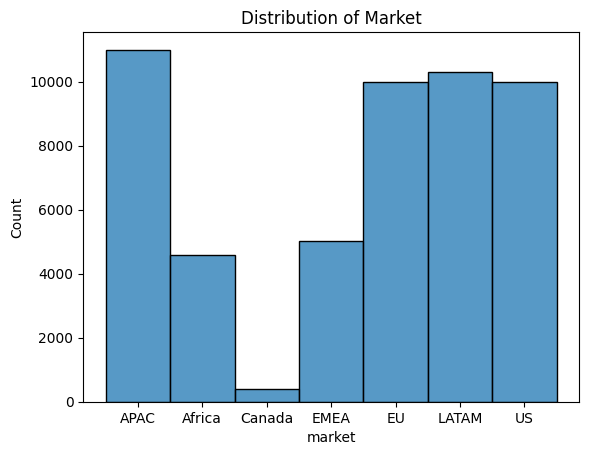

In [16]:
sns.histplot(data = store_df, x = 'market').set_title('Distribution of Market')

##### ***Region***

In [17]:
store_df['region'].value_counts().to_frame()

,region
Central,11117
South,6645
EMEA,5029
North,4785
Africa,4587
Oceania,3487
West,3203
Southeast Asia,3129
East,2848
North Asia,2338


Text(0.5, 1.0, 'Distribution of Region')

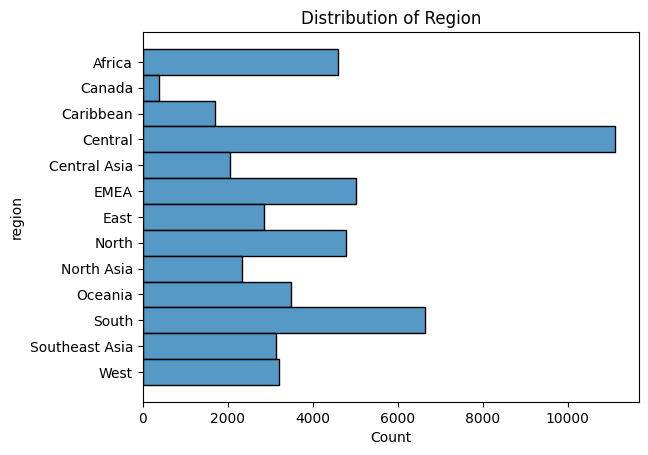

In [18]:
sns.histplot(data = store_df, y = 'region').set_title('Distribution of Region')

##### ***Category***

In [19]:
store_df['category'].value_counts().to_frame()

,category
Office Supplies,31273
Technology,10141
Furniture,9876


Text(0.5, 1.0, 'Distribution of Category')

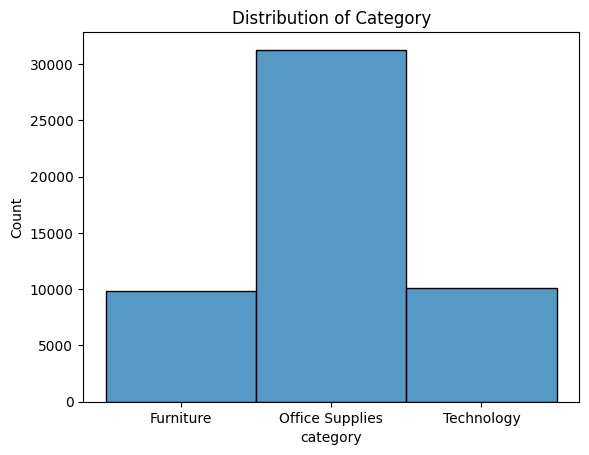

In [20]:
sns.histplot(data = store_df, x = 'category').set_title('Distribution of Category')

##### ***Sub-Category***

In [21]:
store_df['sub_category'].value_counts().to_frame()

,sub_category
Binders,6152
Storage,5059
Art,4883
Paper,3538
Chairs,3434
Phones,3357
Furnishings,3170
Accessories,3075
Labels,2606
Envelopes,2435


Text(0.5, 1.0, 'Distribution of Sub-Category')

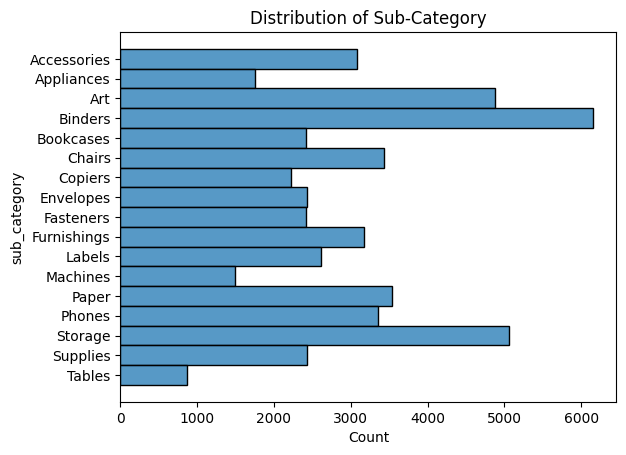

In [22]:
sns.histplot(data = store_df, y = 'sub_category').set_title('Distribution of Sub-Category')

##### ***Product Name***

In [23]:
store_df['product_name'].value_counts().to_frame()

,product_name
Staples,227
"Cardinal Index Tab, Clear",92
"Eldon File Cart, Single Width",90
"Rogers File Cart, Single Width",84
"Ibico Index Tab, Clear",83
...,...
Xerox Blank Computer Paper,1
Panasonic KX MB2061 Multifunction Printer,1
Grip Seal Envelopes,1
"Snap-A-Way Black Print Carbonless Speed Message, No Reply Area, Duplicate",1


#### **2.2. Ordinal**

##### ***Ship Mode:***

In [24]:
store_df['ship_mode'].value_counts().to_frame()

,ship_mode
Standard Class,30775
Second Class,10309
First Class,7505
Same Day,2701


Text(0.5, 1.0, 'Distribution of Ship Mode')

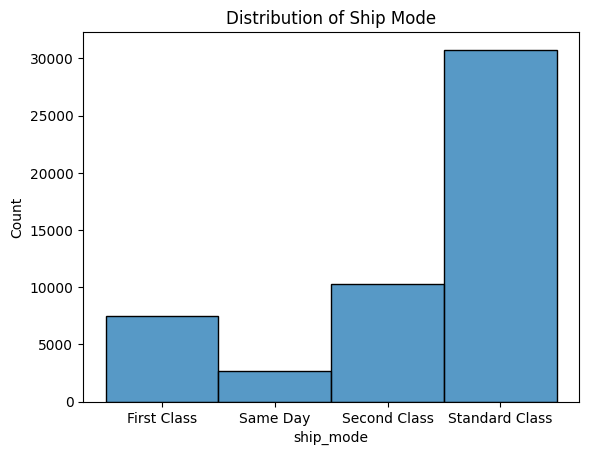

In [25]:
sns.histplot(data = store_df, x = 'ship_mode').set_title('Distribution of Ship Mode')

##### ***Order Priority:***

In [26]:
store_df['order_priority'].value_counts().to_frame()

,order_priority
Medium,29433
High,15501
Critical,3932
Low,2424


Text(0.5, 1.0, 'Distribution of Order Priority')

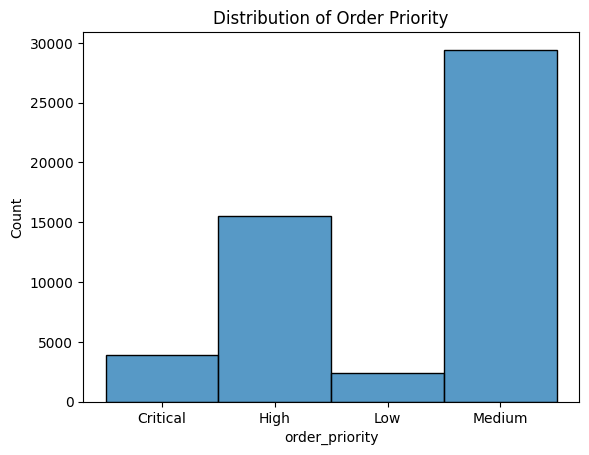

In [27]:
sns.histplot(data = store_df, x = 'order_priority').set_title('Distribution of Order Priority')

## **3. Mô tả dữ liệu định lượng**

Quantitative data:
- Discrete: sales, quantity, year
- Continuous: discount, profit, shipping_cost

In [28]:
store_df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.498440,3.476545,0.142908,28.641740,26.375915,2012.777208
std,487.567175,2.278766,0.212280,174.424113,57.296804,1.098931
min,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,31.000000,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.000000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.000000,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [29]:
Q_df = store_df[['sales', 'quantity', 'discount', 'profit', 'shipping_cost']]
Q_df.head()

,sales,quantity,discount,profit,shipping_cost
order_id,,,,,
AG-2011-2040,408,2,0.0,106.140,35.46
IN-2011-47883,120,3,0.1,36.036,9.72
HU-2011-1220,66,4,0.0,29.640,8.17
IT-2011-3647632,45,3,0.5,-26.055,4.82
IN-2011-47883,114,5,0.1,37.770,4.70


In [30]:
Center_df = pd.DataFrame({'Mean': Q_df.mean(), 'Median': Q_df.median(), 'Mode': Q_df.mode().iloc[0]})
Center_df

,Mean,Median,Mode
sales,246.498440,85.00,13.00
quantity,3.476545,3.00,2.00
discount,0.142908,0.00,0.00
profit,28.641740,9.24,0.00
shipping_cost,26.375915,7.79,0.86


In [31]:
Range = Q_df.max() - Q_df.min()
Quartiles = Q_df.quantile(0.75) - Q_df.quantile(0.25)

In [32]:
Var_df = pd.DataFrame({'Range': Range, 'Quartiles': Quartiles, 'Variance': Q_df.var(), 'STD': Q_df.std(), 'Coef_Var': Q_df.std()/Q_df.mean()})
Var_df

,Range,Quartiles,Variance,STD,Coef_Var
sales,22638.000,220.00,237721.749778,487.567175,1.977973
quantity,13.000,3.00,5.192776,2.278766,0.655469
discount,0.850,0.20,0.045063,0.212280,1.485435
profit,14999.954,36.81,30423.771190,174.424113,6.089858
shipping_cost,933.570,21.84,3282.923736,57.296804,2.172315


# ***SuperStore Sales Dataset in 2014***

In [33]:
store_2014_df = store_df[store_df['year'] == 2014]
store_2014_df.head()

,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
order_id,,,,,,,,,,,,,,,,,,,,
ES-2014-2774938,2014-01-01,2014-01-03,Second Class,Fred Harton,Consumer,Ile-de-France,France,EU,Central,TEC-MA-10001777,Technology,Machines,"Okidata Printer, Red",677,3,0.15,-111.6225,104.69,High,2014
IN-2014-47134,2014-01-01,2014-01-05,Standard Class,Kean Nguyen,Corporate,Victoria,Australia,APAC,Oceania,TEC-MA-10002134,Technology,Machines,"Konica Inkjet, Wireless",846,3,0.10,46.9980,46.20,Medium,2014
IT-2014-4810734,2014-01-01,2014-01-03,Second Class,Alan Shonely,Consumer,Ile-de-France,France,EU,Central,TEC-PH-10002586,Technology,Phones,"Nokia Office Telephone, with Caller ID",332,6,0.15,-43.1370,37.85,Critical,2014
US-2014-105830,2014-01-01,2014-01-03,First Class,Duane Benoit,Consumer,Ohio,United States,US,East,OFF-ST-10002554,Office Supplies,Storage,Tennsco Industrial Shelving,157,4,0.20,-35.2152,30.66,High,2014
CA-2014-160395,2014-01-01,2014-01-07,Standard Class,Kelly Lampkin,Corporate,Nevada,United States,US,West,OFF-BI-10003984,Office Supplies,Binders,Lock-Up Easel 'Spel-Binder',160,7,0.20,53.9217,26.90,Low,2014


## **1. Bảng tần số dữ liệu định tính năm 2014**

Qualitative data:
- Nominal: segment, state, country, market, region, category, sub_category
- Ordinal: ship_mode, order_priority

In [34]:
store_2014_df.describe(include = 'category')

,ship_mode,segment,state,country,market,region,category,sub_category,order_priority
count,17531,17531,17531,17531,17531,17531,17531,17531,17531
unique,4,3,906,138,7,13,3,17,4
top,Standard Class,Consumer,California,United States,APAC,Central,Office Supplies,Binders,Medium
freq,10439,8935,665,3319,3796,3751,10729,2135,10146


#### **1.1. Nominal**

##### ***Segment***

In [35]:
store_2014_df['segment'].value_counts().to_frame()

,segment
Consumer,8935
Corporate,5212
Home Office,3384


Text(0.5, 1.0, 'Distribution of Segment')

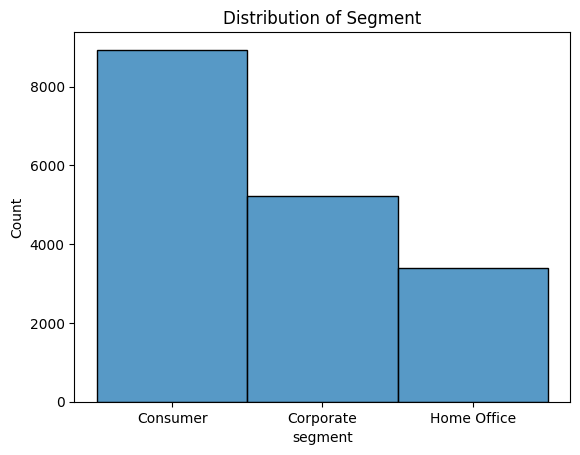

In [36]:
sns.histplot(data = store_2014_df, x = 'segment').set_title('Distribution of Segment')

##### ***Country***

In [37]:
store_2014_df['country'].value_counts().to_frame()

,country
United States,3319
France,1030
Australia,990
Mexico,827
Germany,648
...,...
Djibouti,0
Bahrain,0
Lesotho,0
Armenia,0


##### ***State***

In [38]:
store_2014_df['state'].value_counts().to_frame()

,state
California,665
England,576
Ile-de-France,376
New York,352
Texas,317
...,...
Mashonaland West,0
Maseru,0
Marlborough,0
Mara,0


##### ***Market***

In [39]:
store_2014_df['market'].value_counts().to_frame()

,market
APAC,3796
EU,3528
LATAM,3326
US,3319
EMEA,1811
Africa,1624
Canada,127


Text(0.5, 1.0, 'Distribution of Market')

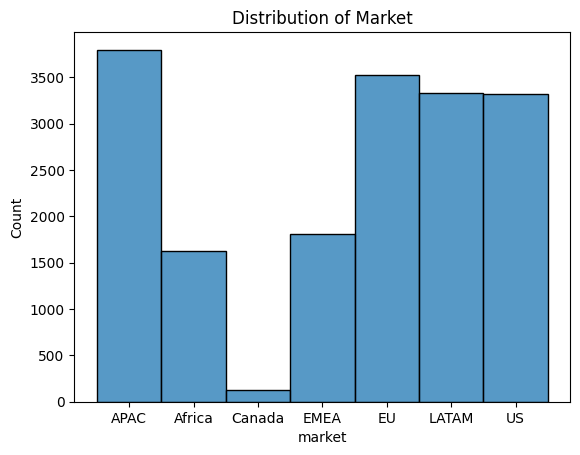

In [40]:
sns.histplot(data = store_2014_df, x = 'market').set_title('Distribution of Market')

##### ***Region***

In [41]:
store_2014_df['region'].value_counts().to_frame()

,region
Central,3751
South,2216
EMEA,1811
North,1641
Africa,1624
Oceania,1193
Southeast Asia,1112
West,1099
East,922
North Asia,754


Text(0.5, 1.0, 'Distribution of Region')

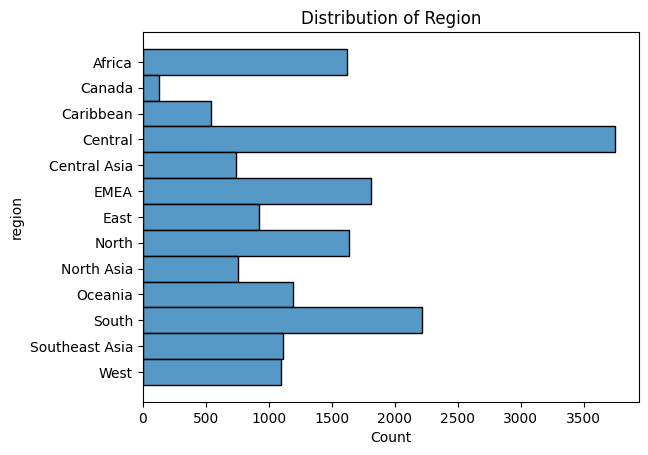

In [42]:
sns.histplot(data = store_2014_df, y = 'region').set_title('Distribution of Region')

##### ***Category***

In [43]:
store_2014_df['category'].value_counts().to_frame()

,category
Office Supplies,10729
Technology,3455
Furniture,3347


Text(0.5, 1.0, 'Distribution of Category')

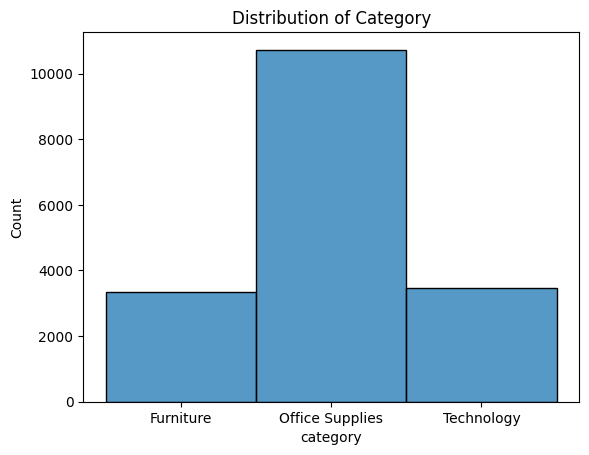

In [44]:
sns.histplot(data = store_2014_df, x = 'category').set_title('Distribution of Category')

##### ***Sub-Category***

In [45]:
store_2014_df['sub_category'].value_counts().to_frame()

,sub_category
Binders,2135
Storage,1747
Art,1692
Paper,1175
Chairs,1154
Phones,1122
Furnishings,1062
Accessories,1033
Labels,904
Supplies,850


Text(0.5, 1.0, 'Distribution of Sub-Category')

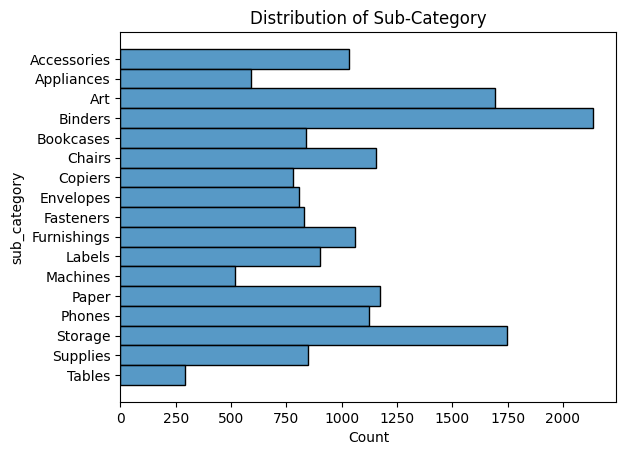

In [46]:
sns.histplot(data = store_2014_df, y = 'sub_category').set_title('Distribution of Sub-Category')

##### ***Product Name***

In [47]:
store_2014_df['product_name'].value_counts().to_frame()

,product_name
Staples,75
"Cardinal Index Tab, Clear",33
"Eldon File Cart, Single Width",31
"Rogers File Cart, Single Width",30
"Stockwell Paper Clips, Assorted Sizes",30
...,...
Riverleaf Stik-Withit Designer Note Cubes,1
Acco Expandable Hanging Binders,1
Logitech G35 7.1-Channel Surround Sound Headset,1
Office Star - Task Chair with Contemporary Loop Arms,1


#### **1.2. Ordinal**

##### ***Ship Mode:***

In [48]:
store_2014_df['ship_mode'].value_counts().to_frame()

,ship_mode
Standard Class,10439
Second Class,3565
First Class,2603
Same Day,924


Text(0.5, 1.0, 'Distribution of Ship Mode')

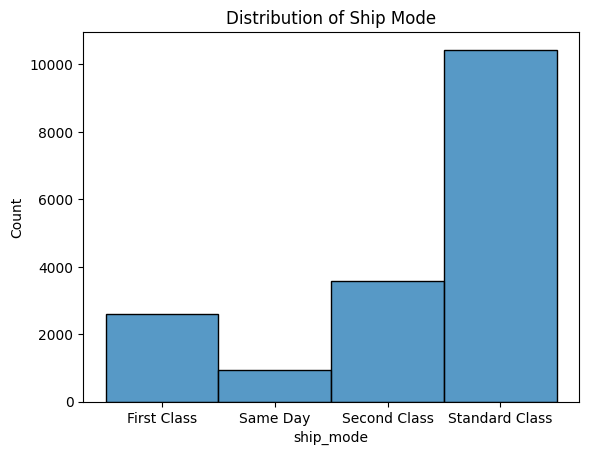

In [49]:
sns.histplot(data = store_2014_df, x = 'ship_mode').set_title('Distribution of Ship Mode')

##### ***Order Priority:***

In [50]:
store_2014_df['order_priority'].value_counts().to_frame()

,order_priority
Medium,10146
High,5256
Critical,1312
Low,817


Text(0.5, 1.0, 'Distribution of Order Priority')

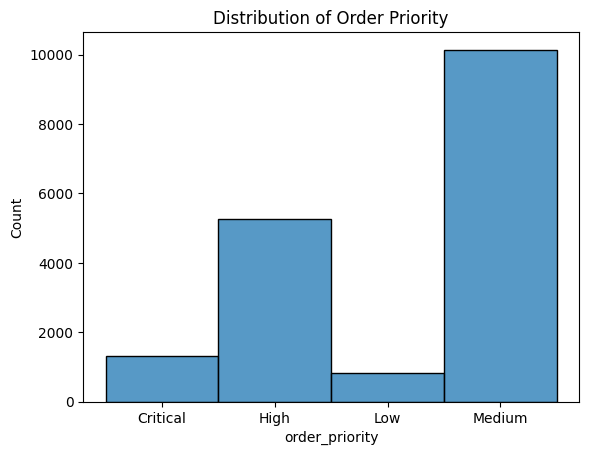

In [51]:
sns.histplot(data = store_2014_df, x = 'order_priority').set_title('Distribution of Order Priority')

## **2. Mô tả dữ liệu định lượng trong năm 2014**

Quantitative data:
- Discrete: sales, quantity, year
- Continuous: discount, profit, shipping_cost

In [52]:
store_2014_df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,17531.000000,17531.000000,17531.000000,17531.000000,17531.000000,17531.0
mean,245.282129,3.457989,0.143291,28.758540,26.268197,2014.0
std,477.630653,2.290856,0.211830,174.283412,56.545259,0.0
min,0.000000,1.000000,0.000000,-3839.990400,0.010000,2014.0
25%,30.000000,2.000000,0.000000,0.000000,2.570000,2014.0
50%,84.000000,3.000000,0.000000,9.200000,7.720000,2014.0
75%,251.000000,5.000000,0.200000,36.808500,24.455000,2014.0
max,14000.000000,14.000000,0.800000,6719.980800,867.690000,2014.0


In [53]:
Q2014_df = store_2014_df[['sales', 'quantity', 'discount', 'profit', 'shipping_cost']]
Q2014_df.head()

,sales,quantity,discount,profit,shipping_cost
order_id,,,,,
ES-2014-2774938,677,3,0.15,-111.6225,104.69
IN-2014-47134,846,3,0.10,46.9980,46.20
IT-2014-4810734,332,6,0.15,-43.1370,37.85
US-2014-105830,157,4,0.20,-35.2152,30.66
CA-2014-160395,160,7,0.20,53.9217,26.90


In [54]:
Center_df = pd.DataFrame({'Mean': Q2014_df.mean(), 'Median': Q2014_df.median(), 'Mode': Q2014_df.mode().iloc[0]})
Center_df

,Mean,Median,Mode
sales,245.282129,84.00,13.0
quantity,3.457989,3.00,2.0
discount,0.143291,0.00,0.0
profit,28.758540,9.20,0.0
shipping_cost,26.268197,7.72,0.7


In [55]:
Range = Q2014_df.max() - Q2014_df.min()
Quartiles = Q2014_df.quantile(0.75) - Q2014_df.quantile(0.25)

In [56]:
Var_df = pd.DataFrame({'Range': Range, 'Quartiles': Quartiles, 'Variance': Q2014_df.var(), 'STD': Q2014_df.std(), 'Coef_Var': Q2014_df.std()/Q2014_df.mean()})
Var_df

,Range,Quartiles,Variance,STD,Coef_Var
sales,14000.0000,221.0000,228131.040878,477.630653,1.947270
quantity,13.0000,3.0000,5.248021,2.290856,0.662482
discount,0.8000,0.2000,0.044872,0.211830,1.478320
profit,10559.9712,36.8085,30374.707566,174.283412,6.060231
shipping_cost,867.6800,21.8850,3197.366360,56.545259,2.152613


# ***Dataset: RFM_SuperStoreSales.csv***

In [4]:
rfm_df = pd.read_csv('RFM_SuperStoreSales.csv', index_col = 'customer_name')
rfm_df.head()

,Customer Segment,M_quantitle,RFM Score,F_quantitle,R_quantitle,last_to_present,Total Paid,InvoiceNo Count
customer_name,,,,,,,,
Emily Grady,Highest Paying Customer,1,131,3,1,22,23114,63
Pauline Webber,Normal,3,123,2,1,7,13888,69
Shaun Weien,Newest Customer,4,144,4,1,7,8247,42
Hunter Lopez,Highest Paying Customer,1,141,4,1,30,30246,53
Ben Wallace,Normal,3,123,2,1,40,14965,68


##### *R_quantitle*

##### *F_quantitle*

##### *M_quantitle*

##### *RFM Scores*

In [ ]:
rfm_df['RFM Score'] = rfm_df['RFM Score'].astype(str)

In [ ]:
rfm_df['RFM Score'].value_counts().to_frame()

,RFM Score
111,117
144,105
133,79
122,73
112,61
134,56
123,51
121,51
132,46
143,43


Text(0.5, 1.0, 'Distribution of RFM Score')

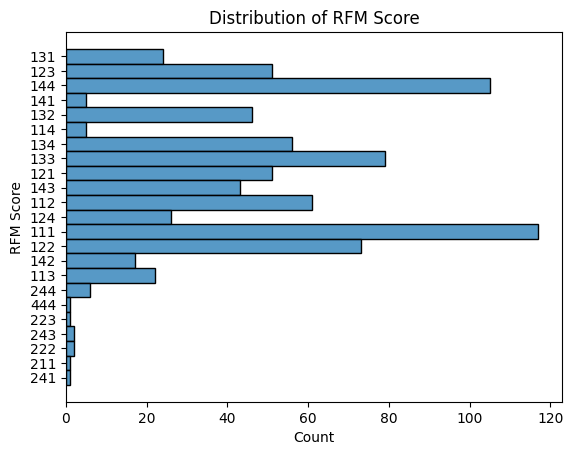

In [ ]:
sns.histplot(data = rfm_df, y = 'RFM Score').set_title('Distribution of RFM Score')

##### *Customer Segment*

In [16]:
customer_df = rfm_df['Customer Segment'].value_counts().to_frame()
customer_df

,Customer Segment
Normal,342
Newest Customer,165
Best Customer,117
Loyal Customer,88
Highest Paying Customer,82
Churn Customer,1


Text(0.5, 1.0, 'Distribution of Customer Segment')

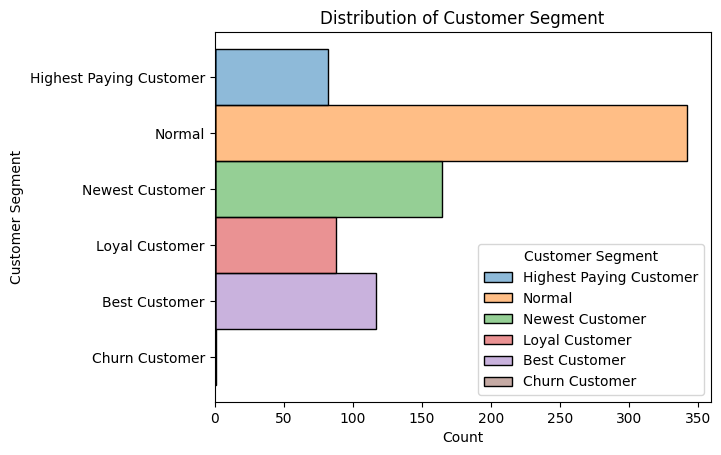

In [52]:
sns.histplot(data = rfm_df, y = 'Customer Segment', hue = 'Customer Segment').set_title('Distribution of Customer Segment')

Text(0.0, 1.0, 'Percentages of Customer Segments')

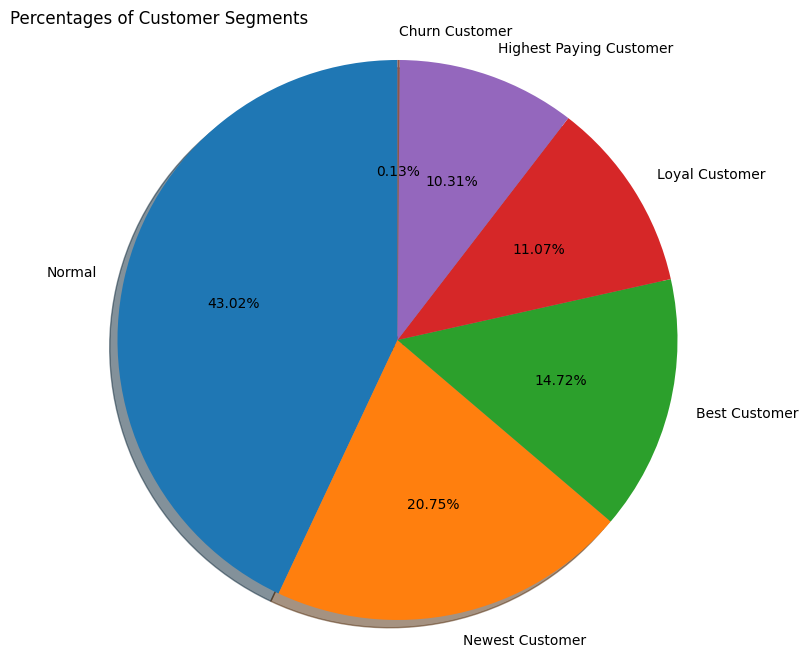

In [37]:
sizes = np.asarray(customer_df).flatten()
labels = 'Normal', 'Newest Customer', 'Best Customer', 'Loyal Customer', 'Highest Paying Customer', 'Churn Customer'

fig,ax = plt.subplots(figsize=(10,8))

ax.pie(sizes, labels = labels,
        autopct='%1.2f%%',
        shadow=True, startangle=90)
ax.axis('equal')
ax.set_title(label='Percentages of Customer Segments', loc='left')